# XBeach generate inputs

#### Initialize libraries

In [1]:
import sys;sys.path.append('../xbeach/')
#from importlib import reload
#from libs import *
from scipy.io import loadmat
#import xbeach as xb
#import utils as ut
#from xbeach_inputs import *
import matplotlib.pyplot as plt
import os
import netCDF4 as nc4
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime,timedelta

### Initialize Paths to files and to output location

In [2]:
root = pl.Path('/Users/tmiesse/work/FHRL/dunex/modeling/xbeach/1d_frisco/run1') # 
path = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/experimental_setups/outputs')
xb = nc4.Dataset(path / 'event1.nc')

In [3]:
grid = pd.read_csv(root / 'test.csv')

In [6]:
z = grid['z'][:] # model elevation
x = grid['cds3d'][:]

In [8]:
vege = []
for ii in range(0,len(z[:])):
    if z[ii]>0.31:
        if 9.6<x[ii]<11.5:
            vege.append(1)
        elif 11.5<x[ii]<16.7:
            vege.append(2)
        elif 16.7<x[ii]:
            vege.append(3)
    else:
        vege.append(0)
np.savetxt('/Users/tmiesse/work/FHRL/dunex/modeling/xbeach/1d_frisco/run1/spartina_map.txt',np.array(vege).reshape(1,len(x)), fmt='%.6e', delimiter='   ')

In [9]:
vege = []
for ii in range(0,len(z[:])):
    if z[ii]>0.48:
        vege.append(0.28)
    else:
        vege.append(0.2)
np.savetxt(root / 'bedfricfile.txt',np.array(vege).reshape(1,len(x)), fmt='%.6e', delimiter='   ')

In [13]:
np.savetxt(root / 'x.grd',np.array(x).reshape(1,len(x)), fmt='%.6e', delimiter='   ')
np.savetxt(root / 'bed.dep',np.array(z).reshape(1,len(x)), fmt='%.6e', delimiter='   ')

In [14]:
len(x)

434

In [5]:
file = pd.read_csv(root / '203867_20200819_1107.csv')

In [6]:
water = file['Depth'].values

In [7]:
ele = -0.331461
guess = 0.05

In [8]:
water_nav = (water-guess)+ele

In [9]:
date2 = pd.date_range(file['2021-05-19 00:00'][0],file['2021-05-19 00:00'].iloc[-1],freq='6H')

KeyError: '2021-05-19 00:00'

In [17]:
water2 = np.interp(date2,pd.to_datetime(file['2021-05-19 00:00']),water_nav)*0.9

In [7]:
root = pl.Path('/Users/tmiesse/work/dewberry/vb_terrace/modeling/xbeach/calib3')

In [18]:
file

,Time,Burst,Depth,Significant wave height,Significant wave period,1/10 wave height,1/10 wave period,Maximum wave height,Maximum wave period,Average wave height,Average wave period,Wave energy,Depth
0,2020-08-02 18:00:00.000,1,0.551460,0.2013,3.7813,0.2423,4.4444,0.2757,4.50,0.1362,2.6134,30.6860,0.551463
1,2020-08-02 18:05:00.000,2,0.541530,0.1552,2.7756,0.1867,3.0909,0.2550,4.25,0.1077,2.1795,19.9906,0.541532
2,2020-08-02 18:10:00.000,3,0.537084,0.1630,3.0000,0.1935,3.1364,0.2433,3.75,0.1090,2.2522,21.8620,0.537089
3,2020-08-02 18:15:00.000,4,0.523505,0.1509,2.7125,0.1801,3.0625,0.2001,2.75,0.1034,2.1345,19.0089,0.523508
4,2020-08-02 18:20:00.000,5,0.523298,0.1412,2.4286,0.1624,2.4792,0.1818,3.25,0.0971,2.0400,16.2209,0.523296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2020-08-19 10:45:00.000,4810,0.040041,0.0000,30.0357,0.4296,36.8750,0.4934,69.00,0.0937,12.7750,125.1775,0.040134
4810,2020-08-19 10:50:00.000,4811,0.002413,0.0000,10.5417,0.0629,13.7500,0.0886,5.50,0.0142,5.5811,1.0433,0.002407
4811,2020-08-19 10:55:00.000,4812,-0.004274,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,-0.004270
4812,2020-08-19 11:00:00.000,4813,-0.024863,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,-0.024852


In [10]:
obs = pd.read_csv('https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20200801&end_date=20200901&datum=NAVD&station=8575512&time_zone=LST&units=metric&format=csv')

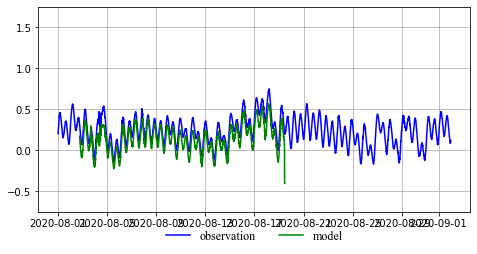

In [11]:
fig = plt.figure(figsize=(6,3))
ax = plt.axes([0,0,1,.95])
plt.rcParams["font.family"] = "Times New Roman"

ax.plot(pd.to_datetime(obs['Date Time']),obs[' Water Level'],'b',label='observation')
ax.plot(pd.to_datetime(file['Time']),water_nav,'g',label='model')
#ax.set_title('Storm 2021 Beggar Bridge',fontsize=14),ax.set_ylabel(r'Water Surface Ele [m at NAVD88]',fontsize=12)
ax.set_ylim([-0.75,1.75])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),ncol=2,frameon=False,fontsize=12)
ax.grid(True)
#plt.savefig(root /'xb_water.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [5]:
file = pd.read_csv(root / 'Spectral Analysis' /'northsite_wave_hs.csv')

In [11]:
file.iloc[3200]

USGS                            USGS
0204300267                 204300267
2021-05-19 00:00    2021-06-01 19:00
EDT                              EDT
-0.56                           0.49
P                                  P
Name: 3200, dtype: object

In [19]:
water[1000]

-0.4

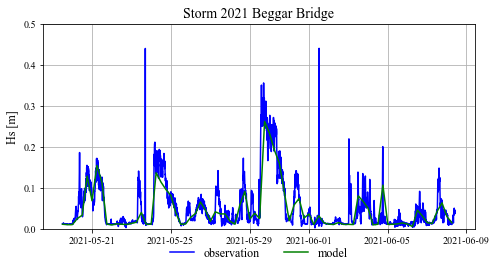

In [13]:
waves = file['0.0121'].values
date2 = pd.date_range(file['5/19/21 12:10'][0],file['5/19/21 12:10'].iloc[-1],freq='6H')
waves2 = np.interp(date2,pd.to_datetime(file['5/19/21 12:10']),waves)*0.9
root = pl.Path('/Users/tmiesse/work/dewberry/vb_terrace/modeling/xbeach/calib3')

fig = plt.figure(figsize=(6,3))
ax = plt.axes([0,0,1,.95])
plt.rcParams["font.family"] = "Times New Roman"

ax.plot(pd.to_datetime(file['5/19/21 12:10']),waves,'b',label='observation')
ax.plot(date2,waves2,'g',label='model')
ax.set_title('Storm 2021 Beggar Bridge',fontsize=14),ax.set_ylabel(r'Hs [m]',fontsize=12)
ax.set_ylim([-0.,.5])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),ncol=2,frameon=False,fontsize=12)
ax.grid(True)
plt.savefig(root /'xb_waves.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [8]:
np.where((pd.to_datetime(file['Datetime'])>pd.to_datetime('2020-10-01 00:00:00'))&(pd.to_datetime(file['Datetime'])<=pd.to_datetime('2020-10-01 01:00:00')))

KeyError: 'Datetime'

In [25]:
file2 = pd.read_csv('/Users/tmiesse/work/dewberry/vb_terrace/data_temp/ODU2nd_measurements/Waves/data/Sen_North_hrFilt.txt',sep=',')

In [26]:
file2

,2021,5,19,12,0,0.1,-0.0193924426040975
0,2021,5,19,13,0,0,1.618038
1,2021,5,19,14,0,0,1.535119
2,2021,5,19,15,0,0,1.539541
3,2021,5,19,16,0,0,1.542767
4,2021,5,19,17,0,0,1.541500
...,...,...,...,...,...,...,...
475,2021,6,8,8,0,0,1.691537
476,2021,6,8,9,0,0,1.692340
477,2021,6,8,10,0,0,1.693111
478,2021,6,8,11,0,0,1.687426


#### Initialize Forcing time parameters

In [30]:
def find_node_ak(fmax,obs_lat,obs_lon):
    min_distance = None
    best_index = 0
    x = fmax.variables['x'][:]
    y = fmax.variables['y'][:]
    for i in range(len(x)):
        current_distance = (float(y[i]) - obs_lat)**2 + (float(x[i]) - obs_lon)**2
        if min_distance is None or current_distance < min_distance:
            best_index = i
            min_distance = current_distance
    #print("best_index:{} ".format(best_index))
    return best_index

In [8]:
def write_tide(root_dir,time,front,back):
    root_dir = pl.Path(root_dir)
    file = root_dir / 'tide.txt'
    data = []
    for i in range(0,len(time)):
        '''
        if float(front[i])/float(front[i]) != 1:
            if float(front[i-1])/float(front[i-1]) != 1:
                front[i] = 0.5
            else:
                front[i] = front[i-1]
        if float(back[i])/float(back[i]) != 1:
            if float(back[i-1])/float(back[i-1]) != 1:
                back[i] = 0.5
            else:
                back[i] = back[i-1]				
         #   front[i] = 0
         #  back[i] = 0
         '''
        data.append('    {:.4e}    {:.4e}    {:.4e}'.format(float(time[i]),float(front[i]),float(back[i])) + '\n')
        #data.append('    {:.4e}    {:.4e}    {:.4e}'.format(float(time[i]),float(front[i]),float(back[i])*1.5) + '\n')
    with open(file,'w') as fin:
        fin.writelines(data)
    return

In [5]:
start = '20170910 00:00:00'
freq = '30min'
nc_file = nc4.Dataset(root / 'implicit015'/ 'swan_HS.63.nc')
node = find_node_ak(nc_file,37.150951, -75.934593) # find the point closest to the coordinates specified
time = pd.DataFrame()
time['time'] = pd.date_range(start=start,periods=int(len(nc_file.variables['swan_HS'][:,node])),freq=freq)

In [6]:
start1,end1 ='2017-09-16 04:00:00','2017-09-22 00:00:00' #find the pts between the specified start and end times

In [7]:
model1 = time.loc[(start1<=time['time'])&(time['time']<end1)].index.values

#### Read and Generate water level forcing for xbeach

In [8]:
h0 = nc4.Dataset(root / 'implicit0045' / 'swan_HS.63.nc','r').variables['swan_HS'][model1[0]:model1[-1],node]
tp = nc4.Dataset(root / 'explicit_cd1' /'swan_TPS.63.nc','r').variables['swan_TPS'][model1[0]:model1[-1],node]
main = nc4.Dataset(root / 'explicit_cd1' / 'swan_DIR.63.nc','r').variables['swan_DIR'][model1[0]:model1[-1],node]
waterlevel = nc4.Dataset(root / 'implicit0045' /'fort.63.nc').variables['zeta'][model1[0]:model1[-1],node]
dt = np.arange(1800,len(h0)*1800,1800)

In [9]:
dt = np.arange(300,len(water_nav[4000:])*300,300)

In [10]:
outpath = path#pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/inputs_v2')

In [35]:
numbers = np.where(water_nav == np.isnan(water_nav))[0]
for num in numbers:
    water_nav[num] = 0

In [22]:
write_tide(outpath,dt,water_nav[4000:],water_nav[4000:])

In [23]:
file['Significant wave height']

,Time,Burst,Depth,Significant wave height,Significant wave period,1/10 wave height,1/10 wave period,Maximum wave height,Maximum wave period,Average wave height,Average wave period,Wave energy,Depth
0,2020-08-02 18:00:00.000,1,0.551460,0.2013,3.7813,0.2423,4.4444,0.2757,4.50,0.1362,2.6134,30.6860,0.551463
1,2020-08-02 18:05:00.000,2,0.541530,0.1552,2.7756,0.1867,3.0909,0.2550,4.25,0.1077,2.1795,19.9906,0.541532
2,2020-08-02 18:10:00.000,3,0.537084,0.1630,3.0000,0.1935,3.1364,0.2433,3.75,0.1090,2.2522,21.8620,0.537089
3,2020-08-02 18:15:00.000,4,0.523505,0.1509,2.7125,0.1801,3.0625,0.2001,2.75,0.1034,2.1345,19.0089,0.523508
4,2020-08-02 18:20:00.000,5,0.523298,0.1412,2.4286,0.1624,2.4792,0.1818,3.25,0.0971,2.0400,16.2209,0.523296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2020-08-19 10:45:00.000,4810,0.040041,0.0000,30.0357,0.4296,36.8750,0.4934,69.00,0.0937,12.7750,125.1775,0.040134
4810,2020-08-19 10:50:00.000,4811,0.002413,0.0000,10.5417,0.0629,13.7500,0.0886,5.50,0.0142,5.5811,1.0433,0.002407
4811,2020-08-19 10:55:00.000,4812,-0.004274,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,-0.004270
4812,2020-08-19 11:00:00.000,4813,-0.024863,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,-0.024852


In [11]:
hs = file['Significant wave height']
tp = file['Significant wave period']
#dt = np.arange(3600,len(hs)*3600,3600)

In [12]:
#root_dir = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/assateague/forcings')
#mainang=270.0
# mgb mainang=90 and es mainang=90
 

#xb.write_tide(outpath,dt,water_nav[18000:],water_nav[18000:])
gammajsp=3.3
s=10.0
fnyq=0.45
timestep=1.0
data = []
period = (len(dt)*300)+300
duration = 300
y = 0
#print(d)
data.append('FILELIST'+'\n')
for i in range(1,int(period/duration)):
    with open(str(outpath / f'jonswap_{i}.txt'),'w') as fin:
        #if (type(h0[y]) == np.ma.core.MaskedConstant) or (h0[y]==np.nan):
        #    h0[y]=0.001
        #    tp[y]=10
        #    main[y]=270
        #elif (type(tp[y]) == np.ma.core.MaskedConstant) or (tp[y]==np.nan):
        #    tp[y]=5
        #    main[y]=270
        #elif (type(main[y]) == np.ma.core.MaskedConstant) or (main[y]==np.nan):
        #    main[y]=270                                        
        fin.write('Hm0           = {:.4e}'.format(hs[y])+ '\n' +
                  'fp            = {:.4e}'.format(float(1/(tp[y])))+ '\n' +
                  'mainang       = {:.4e}'.format(270) + '\n' +
                  'gammajsp      = {:.4e}'.format(gammajsp) + '\n' +
                  's             = {:.4e}'.format(s) + '\n' +
                  'fnyq          = {:.4e}'.format(fnyq) + '\n')
        data.append(f'    {duration}    {timestep}    jonswap_{i}.txt'+'\n')
    y+=1
with open(str(outpath / 'filelist.txt'),'w') as control:
    lines = control.writelines(data)

In [28]:
period

244200

In [56]:
#root_dir = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/assateague/forcings')
#mainang=270.0
# mgb mainang=90 and es mainang=90
dlist = list(path.glob('*'))
for d in dlist:
    if os.path.isdir(d):
        with open(d /'params.txt','w') as fout:
            with open(path / 'params.txt','r') as fin:
                lines = fin.readlines()
                for line in lines:
                    if '{vege}' in line:
                        if 'cd' in d.name:
                            line = 'vegetation    = 1 \n'
                        else:
                            line = 'vegetation    = 0 \n'
                    elif '{stop}' in line:
                        line = f'tstop         = {str((len(dt)*1800))} \n'
                    fout.write(line)
                    
        xb.write_tide(d,dt,waterlevel,waterlevel)
        gammajsp=3.3
        s=10.0
        fnyq=0.45
        timestep=1.0
        data = []
        period = (len(dt)*1800)+1800
        duration = 1800
        y = 0
        print(d)
        data.append('FILELIST'+'\n')
        for i in range(1,int(period/duration)):
            with open(str(d / f'jonswap_{i}.txt'),'w') as fin:
                if (type(h0[y]) == np.ma.core.MaskedConstant) or (h0[y]==np.nan):
                    h0[y]=0.001
                    tp[y]=10
                    main[y]=270
                elif (type(tp[y]) == np.ma.core.MaskedConstant) or (tp[y]==np.nan):
                    tp[y]=5
                    main[y]=270
                elif (type(main[y]) == np.ma.core.MaskedConstant) or (main[y]==np.nan):
                    main[y]=270                                        
                fin.write('Hm0           = {:.4e}'.format(h0[y])+ '\n' +
                          'fp            = {:.4e}'.format(float(1/(tp[y])))+ '\n' +
                          'mainang       = {:.4e}'.format(main[y]) + '\n' +
                          'gammajsp      = {:.4e}'.format(gammajsp) + '\n' +
                          's             = {:.4e}'.format(s) + '\n' +
                          'fnyq          = {:.4e}'.format(fnyq) + '\n')
                data.append(f'    {duration}    {timestep}    jonswap_{i}.txt'+'\n')
            y+=1
        with open(str(d / 'filelist.txt'),'w') as control:
            lines = control.writelines(data)

/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/cd2
/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/cd3
/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/imp0045
/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/cd1
/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/imp015
/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/erratum/eslr_study/mgb/imp008


In [34]:
type(tp[9]) == np.ma.core.MaskedConstant

True

In [18]:
waterlevel = nc4.Dataset(root / 'fort.63.nc').variables['zeta'][:,node]
dt = np.arange(3600,len(time)*3600,3600)
for d in dlist:
    if os.path.isdir(d):
        xb.write_tide(d,dt,waterlevel,waterlevel) # path to gen file, time, water level

In [8]:
waterlevel = nc4.Dataset(path  / 'implicit0045' / 'fort.63.nc').variables['zeta'][:,node]

In [16]:
write_tide(root,np.arange(3600,len(waterlevel[740:])*3600,3600),waterlevel[740:]*2,waterlevel[740:]*2)

In [30]:
len(waterlevel[740:])*3600

259200

#### Read and Generate wave parameters for xbeach

In [6]:
h0 = nc_file.variables['swan_HS'][s_input,node].data
direction = nc4.Dataset(root  / 'base' / 'swan_DIR.63.nc').variables['swan_DIR'][s_input,node].data
tp = nc4.Dataset(root  / 'base' / 'swan_TPS.63.nc').variables['swan_TPS'][s_input,node].data

xb.write_waves(path,hs,tp,1800,1461600,direction) # path to gen file, wave height, wave period, wave duration, model duration, direction

#### Generate Vegetation map for xbeach

In [26]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/assateague/grid')

In [27]:
xb.write_vege_map(root,root /'bed.dep')

In [28]:
def write_frict(path:str,bathy_file:str,fname:str='bedfrict.txt',elevation:float=0.05):
    path = pl.Path(path)
    with open(str(path / bathy_file),'r+') as fin:
        with open(str(path / fname),'w+') as fout:
            lines = fin.readlines()
            for line in lines:
                data = line.strip().split('  ')
                for i in range(0,len(data)):
                   # print(data)
                    vege = []
                    new = []
                    if data != '':            
                        if float(data[i]) > elevation:
                            fout.write('   '+str(0.045))
                        else:
                            fout.write('   '+str(0.02))
                fout.write('\n')
    return

In [29]:
write_frict(root,root /'bed.dep')